# Emotions in text
```
- 데이터셋 출처 : https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text
- 문장의 감정분류 데이터셋
```

# 1. 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 버전 호환성 문제 (경고 메시지) 무시
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# 2. 데이터 로드

In [5]:
# !unzip mini7-dataset.zip

Archive:  mini7-dataset.zip
  inflating: Emotion_final.csv       


In [6]:
file_name = 'Emotion_final.csv'
file_name

'Emotion_final.csv'

In [7]:
data = pd.read_csv(file_name)
print(data.shape)
data.head()

(21459, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## 2-1. 데이터 구조 확인

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


```
- 결측치 없음
```

In [9]:
data.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


```
- 감정을 나타내는 키워드는 총 6개임
```

In [10]:
data['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

```
- 감정 키워드 : happy, sadness, anger, fear, love, surprise
```

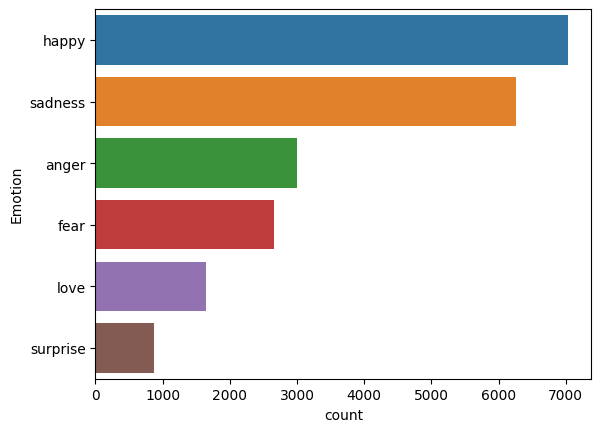

In [11]:
sns.countplot(y=data["Emotion"], order=data["Emotion"].value_counts().index);

```
- 집계 순위 : happy > sadness > anger > fear > love > surprise
```

# 3. 데이터셋 나누기

In [12]:
X = data["Text"]
y = data["Emotion"]

X.shape, y.shape

((21459,), (21459,))

## 3-1. 불용어 제거

In [15]:
# nltk 불용어 리스트 데이터 설치
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/work/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# 영어 불용어 정보 불러오기
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# 불용어 제거 함수
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = stopwords.words('english')
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [18]:
# 불용어 제거 전
X[0]

'i didnt feel humiliated'

In [19]:
# 불용어 제거 함수 적용
X = X.map(remove_stopwords)
X

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
21454                           Melissa stared friend dism
21455    Successive state elections seen governing part...
21456                             Vincent irritated dismay
21457          Kendall-Hume turned back face dismayed coup
21458                                 I dismayed , surpris
Name: Text, Length: 21459, dtype: object

In [20]:
X[0]

'didnt feel humiliated'

```
- X[0] 기존 텍스트 : 'i didnt feel humiliated'
- X[0] 불용어 처리 후 텍스트 : 'didnt feel humiliated'
: 불용어 리스트에 있던 i가 제거됨
```

## 3-2. 인코딩 작업하기
```
- 인코딩하고자하는 컬럼 : 'Emotion'
- 인코딩 후 생성될 컬럼은 6개
```

In [21]:
y_onehot = pd.get_dummies(y)
print(y_onehot.shape)
y_onehot.head()

(21459, 6)


,anger,fear,happy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


## 3-3. Train, Test 나누기

In [22]:
# 라벨값의 비율을 고르게 나누기 위해 train_test_split 함수를 사용한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, 
                                                    test_size=.2, random_state=42
                                                    , stratify=y_onehot)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17167,), (17167, 6), (4292,), (4292, 6))

In [23]:
print(y_train.value_counts(normalize=True))
print("="*80)
print(y_test.value_counts(normalize=True))

anger  fear  happy  love  sadness  surprise
0      0     1      0     0        0           0.327547
             0      0     1        0           0.291955
1      0     0      0     0        0           0.139454
0      1     0      0     0        0           0.123609
       0     0      1     0        0           0.076484
                    0     0        1           0.040951
dtype: float64
anger  fear  happy  love  sadness  surprise
0      0     1      0     0        0           0.327586
             0      0     1        0           0.291938
1      0     0      0     0        0           0.139562
0      1     0      0     0        0           0.123486
       0     0      1     0        0           0.076421
                    0     0        1           0.041007
dtype: float64


# 4. Tokenizer 

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
# 단어 사전의 크기는 10000으로 설정한다.
# 느낌표나 마침표 같은 구두점은 자동 제거 됨

vocab_size = 10000
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words=vocab_size, lower=True, oov_token = oov_tok)

In [26]:
tokenizer.fit_on_texts(X_train)

In [28]:
# 단어 사전을 딕셔너리 형태로 반환
word_to_index = tokenizer.word_index

In [32]:
pd.set_option('display.max_columns', None)
pd.DataFrame(tokenizer.word_counts.items()).sort_values(1, ascending=False).set_index(0).T

,feel,feeling,like,im,really,know,time,get,little,would,people,want,one,still,even,think,ive,life,make,bit,something,much,could,love,dont,going,things,day,way,back,go,pretty,good,need,always,see,also,right,say,feelings,work,feels,around,felt,today,made,though,cant,got,well,happy,help,never,every,someone,less,sure,didnt,quite,enough,makes,look,days,away,many,find,last,left,kind,anything,lot,i,everything,home,better,come,without,person,new,said,getting,take,friends,started,ever,http,sometimes,world,thought,family,week,remember,first,trying,thing,actually,long,able,year,times,rather,href,bad,'s,making,let,already,two,tell,face,often,others,try,end,may,keep,start,since,excited,ill,heart,alone,part,nothing,give,read,looking,us,stressed,might,sad,place,angry,blog,morning,years,write,yet,another,hope,night,weird,put,hate,school,god,wanted,almost,sweet,whole,must,pain,point,old,overwhelmed,anxious,friend,anyone,moment,went,amazing,stop,id,everyone,thinking,guess,found,great,hard,lost,done,next,talk,strange,loved,completely,important,blessed,accepted,fact,hurt,told,self,past,especially,passionate,maybe,sense,depressed,body,agitated,stupid,else,post,man,least,believe,tired,real,leave,hated,share,afraid,use,eyes,helpless,become,understand,girl,free,lately,best,cold,the,coming,writing,reason,towards,inside,nervous,came,starting,wasnt,book,guilty,house,far,thankful,glad,sleep,show,sort,mind,words,strong,slightly,used,head,generous,supporting,miserable,job,care,sorry,scared,loving,amp,wish,live,lonely,probably,taking,mother,mean,perfect,low,cool,child,special,working,wonderful,thats,class,truly,children,ok,looked,call,totally,particularly,months,saying,extremely,exhausted,kids,comfortable,proud,women,finally,reading,fine,frustrated,confident,experience,he,big,lovely,offended,change,safe,doesnt,woke,room,together,thoughts,funny,disappointed,woman,bed,mad,wrong,stuff,story,enjoy,side,spent,irritable,havent,bothered,parents,admit,terrible,hand,matter,future,cannot,positive,beloved,run,amazed,control,knew,ask,hot,walk,hear,close,idea,weeks,missed,miss,instead,resentful,terrified,wont,caring,surprised,lucky,seem,liked,move,emotional,unhappy,dull,energy,saw,tortured,creative,rest,ago,embarrassed,pleased,asked,inspired,hours,uncomfortable,anymore,absolutely,soon,deep,full,super,confused,food,living,irritated,awkward,situation,talking,discouraged,brave,decided,horrible,knowing,took,popular,she,baby,content,seems,husband,selfish,rushed,ashamed,cause,usually,devastated,began,shitty,convinced,small,guy,happen,three,calm,successful,annoyed,punished,gorgeous,relaxed,longer,useful,running,eat,sitting,insecure,weekend,young,lethargic,heartbroken,wear,open,money,comes,satisfied,faithful,needed,cute,youre,fun,somewhat,either,curious,beautiful,however,determined,awful,insulted,useless,watching,ugly,mom,vulnerable,simply,somehow,unsure,nice,shaken,violent,watch,music,frightened,rude,giving,crappy,uncertain,wonder,half,honestly,sit,different,melancholy,impressed,hair,yesterday,hes,fucked,rejected,relationship,dumb,unwelcome,happened,innocent,jealous,kinda,www,optimistic,isolated,longing,hopeful,pressured,hopeless,pleasant,second,pissed,empty,behind,couldnt,stay,support,pathetic,sympathetic,aching,worthless,valuable,wanting,whatever,apprehensive,whether,groggy,men,sick,precious,talented,wake,front,energetic,high,certain,n't,numb,inadequate,suddenly,tonight,bitter,girls,rich,vain,humiliated,disgusted,unimportant,tender,tried,dangerous,beaten,course,shy,joy,superior,turn,sincere,gloomy,realize,realized,divine,cry,upset,definitely,greedy,seeing,sat,paranoid,cranky,needs,defeated,ways,dirty,thrilled,productive,festive,intimidated,set,bitchy,homesick,trust,gone,buy,disheartened,valued,seemed,friendly,weight,couple,ecstatic,called,lives,burdened,smile,distracted,reluctant,boring,taken,drained,blank,assured,respected,supportive,game,nostalgic,voice,hesitant,ready,hands,within,anger,threatened,country,contented,fear,incredibly,mellow,deal,romantic,emotions,shes,word,sm

## 4-1. 텍스트를 숫자 형태로 변경

In [33]:
# texts_to_sequences를 이용하여 text 문장을 숫자로 이루어진 리스트로 변경
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [34]:
print(X_train[0])
print("="*50)
print(train_sequences[0])

didnt feel humiliated
[83, 3, 928, 2034, 8131]


```
- 위 값을 보면, X_train[0]과 train_sequences[0] 값은 서로 관계가 없다는 것을 알 수 있음
- 단어 사전에서 182번에 해당하는 단어는 'started' 임
```

## 4-2. 테스트(texts_to_sequences)

In [35]:
# key값을 리스트로 가져오기
list_key = [k for k in word_to_index.keys()]
print(len(list_key))
print(list_key[:5])

17076
['<oov>', 'feel', 'feeling', 'like', 'im']


In [40]:
# train_sequences[10]에 대한 문장 알아보기
# word_to_index 에서는 인덱스값이 1부터 시작하기 때문에 1을 빼 줌
sample = [list_key[i-1] for i in train_sequences[10]]
sample

['im', 'feeling', 'really', 'good']

In [41]:
# train_sequences[10]를 숫자로 변경하기 전 text 문장
X_train[X_train.str.contains('im feeling really good')]

7661                                im feeling really good
14286    im feeling really good know im getting stronge...
Name: Text, dtype: object

```
- '<oov>'는 사전에 없는 단어를 뜻함 (단어수 제한 시 사전에 없는 단어 등장 시에 처리되는 값)
- 또한, X_train을 숫자로 변경하는 과정에서 순서가 바뀜 (X_train[0]과 train_sequences[0] 값은 다름)
```

# 5. Padding

In [42]:
# 시퀀스 길이 최댓값 
max([len(x) for x in train_sequences]), max([len(y) for y in test_sequences])

(35, 35)

**불용어 제거 전, 후 시퀀스 길이 비교**
```
- 불용어 제거 전 : (66, 62)
- 불용어 제거 후 : (35, 35)
```

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 길이를 sequences 길이를 고려하여 설정
max_length = 40
# 빈 값(0)을 뒤에 오도록 설정
padding_type = "post"

X_train_sp = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type)
X_test_sp = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type)

X_train_sp.shape, X_test_sp.shape

((17167, 40), (4292, 40))

In [44]:
display(X_train_sp[0])
display(X_test_sp[0])

array([  83,    3,  928, 2034, 8131,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

array([  18,    3,    1,    1,   11,  127,   14,  503,  824,   16,  505,
       7106,    1, 4506,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

# 6. Modeling

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dropout, BatchNormalization

In [46]:
# 임베딩할 벡터 차원 설정
embedding_dim = 64

# 정답값을 n_class 변수에 할당
n_class = y_train.shape[1]

In [47]:
"임베딩할 벡터 차원", embedding_dim, "정답값 개수", n_class

('임베딩할 벡터 차원', 64, '정답값 개수', 6)

## 6-1. Train, Validation 데이터셋 나누기

In [48]:
# 균형있게 학습시키기 위해 train_test_split 을 이용하여 train, validation 을 나눈다.
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train_sp, y_train,
                                                              test_size=.2, random_state=42, stratify=y_train)
X_train_val.shape, y_train_val.shape, X_valid.shape, y_valid.shape

((13733, 40), (13733, 6), (3434, 40), (3434, 6))

## 6-2. simple RNN

### 6-2-1. 레이어 쌓기

In [49]:
# Simple RNN 레이어를 사용한 모델을 정의
model1 = Sequential()
# 입력-임베딩층
model1.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model1.add(Bidirectional(SimpleRNN(units=32, return_sequences=True)))
model1.add(Bidirectional(SimpleRNN(units=32)))
model1.add(Dense(units=16, activation='relu'))
# 출력층
model1.add(Dense(units=n_class, activation="softmax"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            640000    
                                                                 
 bidirectional (Bidirectiona  (None, 40, 64)           6208      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               6208      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 653,558
Trainable params: 653,558
Non-trai

### 6-2-2. 컴파일

In [50]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 6-2-3. 학습

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [52]:
# 모델 학습을 실행합니다.
history1 = model1.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 69s 152ms/step - loss: 1.2830 - accuracy: 0.5151 - val_loss: 0.9784 - val_accuracy: 0.6465
Epoch 2/100
430/430 [==============================] - 65s 151ms/step - loss: 0.6607 - accuracy: 0.7446 - val_loss: 0.7239 - val_accuracy: 0.7266
Epoch 3/100
430/430 [==============================] - 65s 151ms/step - loss: 0.3071 - accuracy: 0.8965 - val_loss: 0.5595 - val_accuracy: 0.8276
Epoch 4/100
430/430 [==============================] - 65s 151ms/step - loss: 0.1200 - accuracy: 0.9640 - val_loss: 0.5555 - val_accuracy: 0.8276
Epoch 5/100
430/430 [==============================] - 65s 151ms/step - loss: 0.0560 - accuracy: 0.9838 - val_loss: 0.6578 - val_accuracy: 0.8288
Epoch 6/100
430/430 [==============================] - 65s 152ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.6684 - val_accuracy: 0.8305
Epoch 7/100
430/430 [==============================] - 65s 151ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.7498 -

### 6-2-4. 결과 확인 및 시각화

In [53]:
df_hist1 = pd.DataFrame(history1.history)
df_hist1

,loss,accuracy,val_loss,val_accuracy
0,1.282992,0.515110,0.978448,0.646476
1,0.660699,0.744630,0.723872,0.726558
2,0.307102,0.896454,0.559533,0.827606
3,0.120000,0.964028,0.555455,0.827606
4,0.056019,0.983835,0.657792,0.828771
5,0.035832,0.989660,0.668428,0.830518
6,0.031475,0.990607,0.749801,0.822947
7,0.038505,0.987257,0.862828,0.817123
8,0.031790,0.989223,0.833913,0.812755


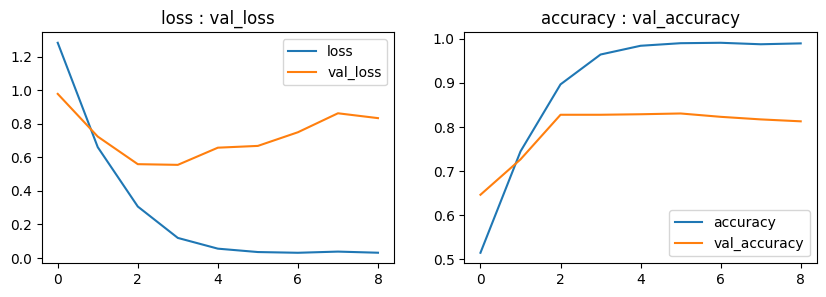

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist1[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist1[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

```
과대적합 이슈 해결 X
```

### 6-2-5. 예측

In [55]:
y_pred = model1.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 3s 20ms/step


array([[9.99288023e-01, 5.44686278e-04, 1.44279882e-04, 1.14883846e-07,
        2.25828171e-05, 3.65580576e-07],
       [3.63941649e-06, 5.10240316e-05, 4.94139476e-06, 3.34905963e-05,
        9.99799907e-01, 1.07018037e-04],
       [8.20185840e-02, 5.91019110e-04, 6.71722233e-01, 3.23480141e-04,
        4.75004353e-02, 1.97844177e-01],
       [9.97407138e-01, 1.38351251e-03, 1.12720765e-03, 7.19080447e-07,
        7.75264270e-05, 3.93238406e-06],
       [1.48189568e-03, 4.57375563e-07, 9.98419285e-01, 9.37000004e-05,
        3.96038376e-06, 7.30799798e-07]], dtype=float32)

### 6-2-6. 평가

In [56]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [57]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [58]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8191985088536813

In [59]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[3])
print("="*80)
print("예측 감정 :", y_predict[3])
print("정답 감정 :", y_test_val[3])

텍스트 : feel like meet subtly obnoxious annoying people universe
예측 감정 : 0
정답 감정 : 0


```
- i feel like i meet the most subtly obnoxious annoying people in the universe
  - 우주에서 가장 미묘하게 짜증나는 사람을 만난 것 같은 기분이다.
 
- 예측 감정 : anger(0) 
- 정답 감정 : anger(0)
: 감정 분석이 제대로 이루어짐
```

## 6-3. LSTM (1)

### 6-3-1. 레이어 쌓기

In [60]:
model2 = Sequential()
# 입력-임베딩층
model2.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model2.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model2.add(Bidirectional(LSTM(units=32)))
model2.add(Dense(units=16, activation='relu'))
# 출력층
model2.add(Dense(units=n_class, activation="softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 64)            640000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 40, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 690,806
Trainable params: 690,806
Non-tr

### 6-3-2. 컴파일

In [61]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 6-3-3. 학습

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [63]:
history2 = model2.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 13s 17ms/step - loss: 1.1744 - accuracy: 0.5474 - val_loss: 0.6144 - val_accuracy: 0.7921
Epoch 2/100
430/430 [==============================] - 6s 14ms/step - loss: 0.3437 - accuracy: 0.8882 - val_loss: 0.3776 - val_accuracy: 0.8695
Epoch 3/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1496 - accuracy: 0.9518 - val_loss: 0.3951 - val_accuracy: 0.8722
Epoch 4/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0962 - accuracy: 0.9686 - val_loss: 0.4135 - val_accuracy: 0.8748
Epoch 5/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0686 - accuracy: 0.9767 - val_loss: 0.4440 - val_accuracy: 0.8768
Epoch 6/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0471 - accuracy: 0.9836 - val_loss: 0.4627 - val_accuracy: 0.8774
Epoch 7/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.6059 - val_accuracy

### 6-3-4. 결과 확인 및 시각화

In [64]:
df_hist2 = pd.DataFrame(history2.history)
df_hist2

,loss,accuracy,val_loss,val_accuracy
0,1.174376,0.547368,0.614418,0.792079
1,0.343657,0.888153,0.377555,0.869540
2,0.149604,0.951795,0.395119,0.872161
3,0.096248,0.968616,0.413482,0.874782
4,0.068628,0.976698,0.444025,0.876820
5,0.047054,0.983616,0.462734,0.877402
6,0.038183,0.987184,0.605932,0.868375
7,0.034955,0.987330,0.589760,0.866628
8,0.033122,0.988204,0.548698,0.877694
9,0.028545,0.989442,0.566343,0.873326


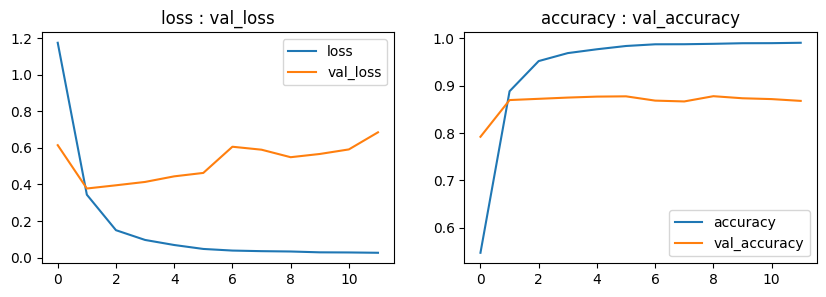

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist2[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist2[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 6-3-5. 예측

In [66]:
y_pred = model2.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 6ms/step


array([[9.9130589e-01, 1.5962060e-03, 6.5822471e-03, 2.6430342e-07,
        5.1502802e-04, 4.2143429e-07],
       [4.5191089e-04, 5.2357351e-05, 1.2366945e-04, 1.4395533e-04,
        9.9922669e-01, 1.4264732e-06],
       [4.0583686e-06, 1.5952933e-06, 9.9997294e-01, 1.5466885e-05,
        5.8452156e-06, 6.1355024e-08],
       [9.7034633e-01, 1.9449474e-03, 6.6941441e-03, 9.9804965e-06,
        2.1001976e-02, 2.6762928e-06],
       [5.1830168e-05, 1.9006959e-05, 9.9986959e-01, 2.9300834e-05,
        2.9573568e-05, 6.9074827e-07]], dtype=float32)

### 6-3-6. 평가

In [67]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [68]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [69]:
# 성능 확인
(y_test_val == y_predict).mean()

0.864165890027959

In [70]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[8])
print("="*100)
print("예측 감정 :", y_predict[8])
print("정답 감정 :", y_test_val[8])

텍스트 : feel like maybe going stop loving maybe true im terrible wife
예측 감정 : 2
정답 감정 : 3


```
- i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
  - 나는 어쩌면 그가 나를 사랑하는 것을 멈출지도 모른다는 생각이 든다. 또는 어쩌면 그것은 사실이고 나는 끔찍한 아내이다.

- 예측 감정 : happy(2) 
- 정답 감정 : love(3)
: 감정 분석이 제대로 이루어지지않음
```

In [71]:
# 확률값으로 확인하기
y_pred[8]

array([1.7046345e-08, 3.8768857e-07, 9.7599411e-01, 2.3806820e-02,
       1.9026967e-04, 8.4903413e-06], dtype=float32)

```
- 8번 인덱스에 위치한 텍스트에 대한 예측값은 가장 확률값이 큰 happy로 분류되었다.
- 실제 감정인 love의 확률값과 크게 차이가 나지 않는다.
```

In [72]:
y_pred[8][2] - y_pred[8][3]

0.9521873

```
- 불용어 제거 전 : 0.15539292 차이로 인해 모델은 love가 아닌 happy로 분류했다.
- 불용어 제거 후 : 0.9521873 차이로 확률간 차이가 커졌다.
```

## 6-4. LSTM (2)

### 6-4-1. 레이어 쌓기

In [73]:
model3 = Sequential()
# 입력-임베딩층
model3.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model3.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model3.add(Bidirectional(LSTM(units=64)))
model3.add(Dense(units=32, activation='selu'))
model3.add(Dense(units=32, activation='selu'))
# 출력층
model3.add(Dense(units=n_class, activation="softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 64)            640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 40, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 6)                

### 6-4-2. 컴파일

In [74]:
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 6-4-3. 학습

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [76]:
history3 = model3.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 13s 18ms/step - loss: 0.9063 - accuracy: 0.6540 - val_loss: 0.3945 - val_accuracy: 0.8725
Epoch 2/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2297 - accuracy: 0.9204 - val_loss: 0.3215 - val_accuracy: 0.8850
Epoch 3/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1055 - accuracy: 0.9625 - val_loss: 0.3539 - val_accuracy: 0.8905
Epoch 4/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0697 - accuracy: 0.9758 - val_loss: 0.4025 - val_accuracy: 0.8844
Epoch 5/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0559 - accuracy: 0.9796 - val_loss: 0.4769 - val_accuracy: 0.8725
Epoch 6/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0536 - accuracy: 0.9803 - val_loss: 0.4959 - val_accuracy: 0.8786
Epoch 7/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0397 - accuracy: 0.9859 - val_loss: 0.4815 - val_accuracy

### 6-4-4. 결과 확인 및 시각화

In [77]:
df_hist3 = pd.DataFrame(history3.history)
df_hist3

,loss,accuracy,val_loss,val_accuracy
0,0.906300,0.654045,0.394470,0.872452
1,0.229743,0.920411,0.321504,0.884974
2,0.105534,0.962499,0.353862,0.890507
3,0.069686,0.975825,0.402541,0.884391
4,0.055892,0.979611,0.476916,0.872452
5,0.053631,0.980267,0.495915,0.878567
6,0.039702,0.985946,0.481535,0.877694
7,0.033141,0.987038,0.515205,0.884683
8,0.027901,0.989951,0.549685,0.873326
9,0.025449,0.990971,0.577670,0.879150


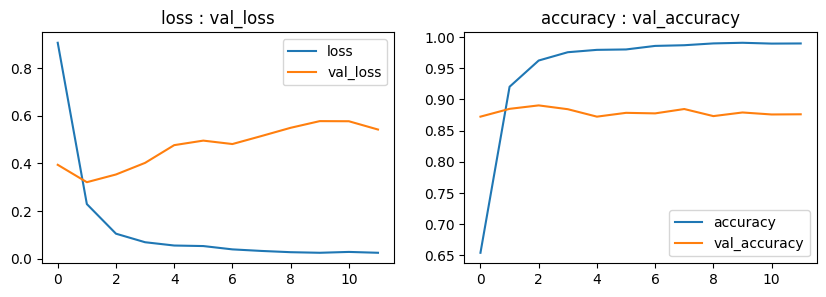

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist3[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist3[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 6-4-5. 예측

In [79]:
y_pred = model3.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 6ms/step


array([[9.9982160e-01, 7.8156321e-05, 3.5612862e-05, 2.8739933e-05,
        3.5071742e-05, 8.0781427e-07],
       [4.8292609e-04, 3.6821282e-04, 1.5846008e-05, 2.5794277e-05,
        9.9907184e-01, 3.5369856e-05],
       [8.3863233e-05, 6.8022414e-06, 9.9976903e-01, 4.6957270e-05,
        7.6028315e-05, 1.7308832e-05],
       [8.4086927e-03, 9.8715740e-01, 1.8016207e-03, 2.5429081e-03,
        5.5440341e-05, 3.3917488e-05],
       [2.9499159e-04, 2.8685066e-05, 9.9957782e-01, 6.4644766e-05,
        2.1880280e-05, 1.1902363e-05]], dtype=float32)

### 6-4-6. 평가

In [80]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 1, 2])

In [81]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [82]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8832712022367195

In [83]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[8])
print("="*100)
print("예측 감정 :", y_predict[8])
print("정답 감정 :", y_test_val[8])

텍스트 : feel like maybe going stop loving maybe true im terrible wife
예측 감정 : 3
정답 감정 : 3


```
- i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
  - 나는 어쩌면 그가 나를 사랑하는 것을 멈출지도 모른다는 생각이 든다. 또는 어쩌면 그것은 사실이고 나는 끔찍한 아내이다.

- 예측 감정 : love(3) 
- 정답 감정 : love(3)
: 감정 분석이 제대로 이루어짐
```

## 6-5. GRU (1)

### 6-5-1. 레이어 쌓기

In [84]:
model4 = Sequential()
# 입력-임베딩층
model4.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model4.add(Bidirectional(GRU(units=32, return_sequences=True)))
model4.add(Bidirectional(GRU(units=32)))
model4.add(Dense(units=16, activation='relu'))
# 출력층
model4.add(Dense(units=n_class, activation="softmax"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 64)            640000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 40, 64)           18816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
Total params: 678,774
Trainable params: 678,774
Non-tr

### 6-5-2. 컴파일

In [85]:
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 6-5-3. 학습

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [87]:
history4 = model4.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 12s 18ms/step - loss: 1.1793 - accuracy: 0.5544 - val_loss: 0.6899 - val_accuracy: 0.7609
Epoch 2/100
430/430 [==============================] - 6s 14ms/step - loss: 0.4686 - accuracy: 0.8396 - val_loss: 0.4450 - val_accuracy: 0.8553
Epoch 3/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2411 - accuracy: 0.9210 - val_loss: 0.4020 - val_accuracy: 0.8794
Epoch 4/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1536 - accuracy: 0.9459 - val_loss: 0.4063 - val_accuracy: 0.8824
Epoch 5/100
430/430 [==============================] - 6s 15ms/step - loss: 0.0999 - accuracy: 0.9639 - val_loss: 0.4018 - val_accuracy: 0.8832
Epoch 6/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0781 - accuracy: 0.9726 - val_loss: 0.4275 - val_accuracy: 0.8891
Epoch 7/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0608 - accuracy: 0.9781 - val_loss: 0.4167 - val_accuracy

### 6-5-4. 결과 확인 및 시각화

In [88]:
df_hist4 = pd.DataFrame(history4.history)
df_hist4

,loss,accuracy,val_loss,val_accuracy
0,1.179281,0.554358,0.689925,0.760920
1,0.468561,0.839583,0.445023,0.855271
2,0.241085,0.920993,0.401953,0.879441
3,0.153569,0.945897,0.406325,0.882353
4,0.099882,0.963883,0.401783,0.883227
5,0.078053,0.972621,0.427504,0.889051
6,0.060788,0.978082,0.416666,0.895166
7,0.044379,0.984126,0.419665,0.891963
8,0.034542,0.987257,0.455106,0.895166
9,0.032850,0.987184,0.444328,0.896622


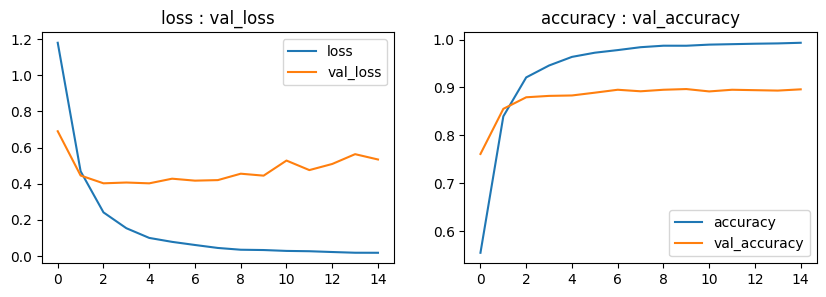

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist4[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist4[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 6-5-5. 예측

In [90]:
y_pred = model4.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 5ms/step


array([[9.9973530e-01, 1.8659797e-04, 5.0172956e-05, 2.7738277e-05,
        5.6116999e-08, 3.4090409e-08],
       [2.0034211e-05, 8.7032240e-06, 3.0626441e-05, 1.2825099e-07,
        9.9993837e-01, 2.1041469e-06],
       [3.8230596e-06, 1.0482322e-11, 9.9985039e-01, 1.4465505e-04,
        1.0307049e-06, 3.1068650e-12],
       [9.9725902e-01, 2.6563029e-03, 7.0140304e-05, 1.4146337e-05,
        1.1188348e-07, 1.9353867e-07],
       [5.7273166e-05, 9.3792307e-11, 9.9943644e-01, 5.0596514e-04,
        2.6481641e-07, 7.4203005e-12]], dtype=float32)

### 6-5-6. 평가

In [91]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [92]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [93]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8949207828518173

In [96]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[10])
print("="*100)
print("예측 감정 :", y_predict[10])
print("정답 감정 :", y_test_val[10])

텍스트 : feel california democrats little smug safely liberal districts lend much value added serious debate usually find less offensive
예측 감정 : 2
정답 감정 : 2


```
- i feel that california democrats a little too smug in their safely liberal districts lend much value added to any serious debate but i usually find them less offensive
  - 나는 캘리포니아 민주당원들이 그들의 안전한 자유주의 지역에서 약간 너무 독선적인 것이 어떤 심각한 토론에도 많은 가치를 제공한다고 느끼지만, 나는 보통 그들이 덜 불쾌하다고 생각한다.
  
- 예측 감정 : happy(2)
- 정답 감정 : happy(2)
: 감정 분석이 제대로 이루어짐
```

## 6-6. GRU (2)

### 6-6-1. 레이어 쌓기

In [97]:
model5 = Sequential()
# 입력-임베딩층
model5.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model5.add(Bidirectional(GRU(units=64, return_sequences=True)))
model5.add(Bidirectional(GRU(units=64)))
model5.add(Dense(units=32, activation='selu'))
# 출력층
model5.add(Dense(units=n_class, activation="softmax"))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 64)            640000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 40, 128)          49920     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
Total params: 768,742
Trainable params: 768,742
Non-tr

### 6-6-2. 컴파일

In [98]:
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 6-6-3. 학습

In [99]:
history5 = model5.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 12s 17ms/step - loss: 0.8808 - accuracy: 0.6693 - val_loss: 0.3739 - val_accuracy: 0.8692
Epoch 2/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1986 - accuracy: 0.9291 - val_loss: 0.2744 - val_accuracy: 0.9024
Epoch 3/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0959 - accuracy: 0.9629 - val_loss: 0.3040 - val_accuracy: 0.9004
Epoch 4/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0571 - accuracy: 0.9790 - val_loss: 0.3382 - val_accuracy: 0.8992
Epoch 5/100
430/430 [==============================] - 8s 18ms/step - loss: 0.0441 - accuracy: 0.9845 - val_loss: 0.4058 - val_accuracy: 0.8914
Epoch 6/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0430 - accuracy: 0.9843 - val_loss: 0.4080 - val_accuracy: 0.8978
Epoch 7/100
430/430 [==============================] - 6s 14ms/step - loss: 0.0377 - accuracy: 0.9863 - val_loss: 0.4161 - val_accuracy

### 6-6-4. 결과 확인 및 시각화

In [100]:
df_hist5 = pd.DataFrame(history5.history)
df_hist5

,loss,accuracy,val_loss,val_accuracy
0,0.880830,0.669337,0.373909,0.869249
1,0.198642,0.929149,0.274442,0.902446
2,0.095871,0.962936,0.303995,0.900408
3,0.057075,0.979029,0.338244,0.899243
4,0.044089,0.984490,0.405786,0.891380
5,0.042990,0.984271,0.407952,0.897787
6,0.037711,0.986310,0.416092,0.899825
7,0.028583,0.989150,0.450039,0.892545
8,0.030204,0.989514,0.431007,0.895166
9,0.023159,0.991116,0.462833,0.889342


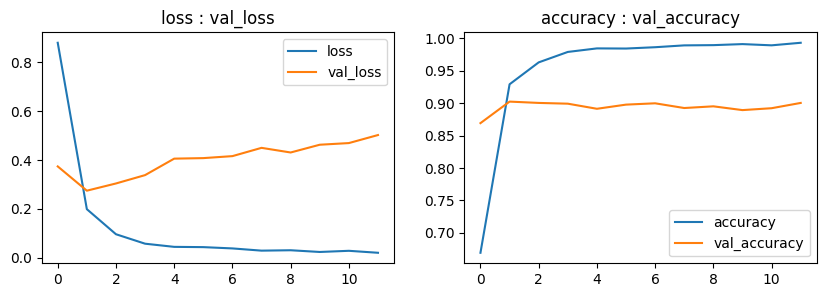

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist5[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist5[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 6-6-5. 예측

In [102]:
y_pred = model5.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 6ms/step


array([[9.9994457e-01, 4.2356667e-05, 1.6178019e-06, 9.1577049e-06,
        5.4288375e-07, 1.8208578e-06],
       [5.5639929e-04, 3.2870070e-05, 1.7253655e-06, 3.7330035e-06,
        9.9940443e-01, 7.9120099e-07],
       [3.3976926e-07, 6.3570855e-07, 9.9998701e-01, 1.0881719e-05,
        1.1259345e-06, 4.4254733e-08],
       [9.9896669e-01, 5.2976754e-04, 3.8239395e-04, 7.6594813e-05,
        2.7652683e-07, 4.4275806e-05],
       [1.2098788e-07, 3.1789494e-08, 9.9999774e-01, 2.0016885e-06,
        1.1009697e-07, 6.7736006e-10]], dtype=float32)

### 6-6-6. 평가

In [103]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [104]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [105]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8951537744641193

In [106]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[100])
print("="*100)
print("예측 감정 :", y_predict[100])
print("정답 감정 :", y_test_val[100])

텍스트 : restrain emotion asked asked su wen laugh said see us smiling side maybe feeling sincere concern su wen right
예측 감정 : 2
정답 감정 : 2


```
- i restrain all emotion asked asked her su wen is a laugh said see us smiling at the side maybe the feeling that i am sincere concern for su wen is right
  - 나는 그녀에게 질문한 모든 감정을 억제한다. 그녀는 웃는다. 우리가 옆에서 웃고 있는 것을 보자. 아마도 내가 수웬을 진심으로 걱정한다는 느낌이 맞을 것이다.
  
- 예측 감정 : happy(2)
- 정답 감정 : happy(2)
: 감정 분석이 제대로 이루어짐
```

**최종 정리**
```
- 불용어 제거 과정은 과대적합 이슈를 해결하지 못함
```